In [89]:
import pandas as pd
import numpy as np
from keras import models 
from keras import layers
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import csv
import os

In [56]:
# We are preparing the input data 

# Loading the training and test data 
df1 = pd.read_csv('train.csv')
test_images = pd.read_csv('test.csv')

#Creating training label and data

train_labels = df1['label']
train_images = df1.drop(labels = ['label'], axis =1)

#Normalizing data to greyscale 
train_images = train_images/255.0
test_images = test_images/255.0
print(len(test_images))

#Train/Validation split
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, shuffle = True, test_size = 0.2)

#Reshaping Data for the CNN 
train_samples, val_samples = int(len(train_images)*0.8) , int(len(train_images)*0.2)

test_images = test_images.to_numpy().reshape((28000,28,28,1))
x_train = x_train.to_numpy().reshape((train_samples, 28, 28, 1))
x_val = x_val.to_numpy().reshape((val_samples, 28, 28, 1)) 

#Creating One hot encoding labels 
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

28000


In [57]:
#Create the network


def get_model(): 
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

model = get_model()

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [59]:
history = model.fit(
        x_train, 
        y_train, 
        epochs = 5, 
        batch_size = 512, 
        validation_data = (x_val, y_val)
    )

Epoch 1/5
66/66 [==============================] - 21s 290ms/step - loss: 1.2725 - accuracy: 0.5802 - val_loss: 0.2846 - val_accuracy: 0.9101
Epoch 2/5
66/66 [==============================] - 18s 280ms/step - loss: 0.2351 - accuracy: 0.9259 - val_loss: 0.2027 - val_accuracy: 0.9383
Epoch 3/5
66/66 [==============================] - 19s 285ms/step - loss: 0.1287 - accuracy: 0.9598 - val_loss: 0.1063 - val_accuracy: 0.9661
Epoch 4/5
66/66 [==============================] - 19s 285ms/step - loss: 0.0820 - accuracy: 0.9741 - val_loss: 0.0710 - val_accuracy: 0.9777
Epoch 5/5
66/66 [==============================] - 18s 281ms/step - loss: 0.0615 - accuracy: 0.9799 - val_loss: 0.0802 - val_accuracy: 0.9750


In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

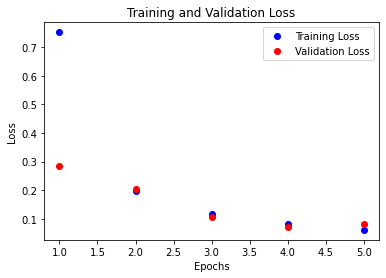

In [61]:
epochs = range(1,6) 
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(epochs, training_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, validation_loss, 'ro', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

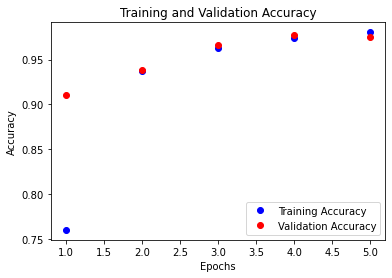

In [62]:
epochs = range(1,6) 
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']

plt.plot(epochs, training_loss, 'bo', label = 'Training Accuracy')
plt.plot(epochs, validation_loss, 'ro', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)

In [97]:
image_id = []
for i, value in enumerate(predictions): 
    image_id.append(i+1)
    
df = pd.DataFrame(
    {
        'ImageID' : image_id, 
        'Label' : predictions
    }
)
directory = os.getcwd() + "\\predictions.csv"

df.to_csv(path_or_buf = directory, index=False)